In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1. Повнозв'язані нейронні мережі.
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

In [2]:
df = pd.read_csv('../Lab 1/AIDS_Classification.csv')
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [3]:
X = df.drop(columns=['infected'])
y = df['infected']
X = np.array(X)
y = np.array(y)
object = StandardScaler()
X = object.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 40)

In [6]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


# Автоматичне диференціювання

In [7]:
y = lambda x: x ** 2
h = 0.001
x_0 = -2
diff_y = (y(x_0 + h) - y(x_0 - h)) / 2 * h
print(diff_y)

-3.999999999999559e-06


In [8]:
x_0 = tf.Variable(-2.0)
print(x_0)
with tf.GradientTape() as tape:
    y = x_0 ** 2
print(y)
diff_y = tape.gradient(y, x_0)
diff_y = diff_y.numpy()
print(diff_y)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.0>
tf.Tensor(4.0, shape=(), dtype=float32)
-4.0


In [9]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  l = tf.reduce_mean(y**2)

dl_dw, dl_db = tape.gradient(l, [w, b])
print(dl_dw.numpy(), dl_db.numpy(), sep='\n')

del tape

[[ -3.5887048   1.5353281]
 [ -7.1774096   3.0706563]
 [-10.766114    4.6059847]]
[-3.5887048  1.5353281]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [11]:
model = Sequential([
    Dense(100, activation="relu", input_shape=(X_train.shape[1],)), # повнозв'язний шар, який складається зі 100 нейронів, relu дає нелінійність
    Dense(100, activation="relu"),  
    Dense(1, activation="sigmoid") # 1 нейрон на виході, бо бінарна класифікація
])

C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Компіляція моделі
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(), #як в логістичній регресії
    metrics=["accuracy"]
)

In [13]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=35,
    batch_size=32
)

Epoch 1/35
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7678 - loss: 0.5553 - val_accuracy: 0.8150 - val_loss: 0.4190
Epoch 2/35
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8221 - loss: 0.4088 - val_accuracy: 0.8346 - val_loss: 0.3696
Epoch 3/35
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8491 - loss: 0.3391 - val_accuracy: 0.8486 - val_loss: 0.3394
Epoch 4/35
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8705 - loss: 0.2993 - val_accuracy: 0.8626 - val_loss: 0.3313
Epoch 5/35
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8860 - loss: 0.2628 - val_accuracy: 0.8682 - val_loss: 0.3167
Epoch 6/35
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9035 - loss: 0.2402 - val_accuracy: 0.8701 - val_loss: 0.3157
Epoch 7/35
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8960 - loss: 0.2356 - val_accuracy: 0.8720 - val_loss: 0.3116
Epoch 8/35
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8964 - loss: 0.2340 - val_accuracy: 0.8804 - v

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8788 - loss: 0.4416
Test Loss: 0.4865
Test Accuracy: 0.8682


2. Згорткові нейронні мережі

Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі двома способами:

а. навчить мережу з нуля (from scratch)

б. застосуйте перенесення навчання (transfer learning from pre-trained weights)

Порівняйте результати (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt

Found 900 files belonging to 6 classes.
Класи медуз: ['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']


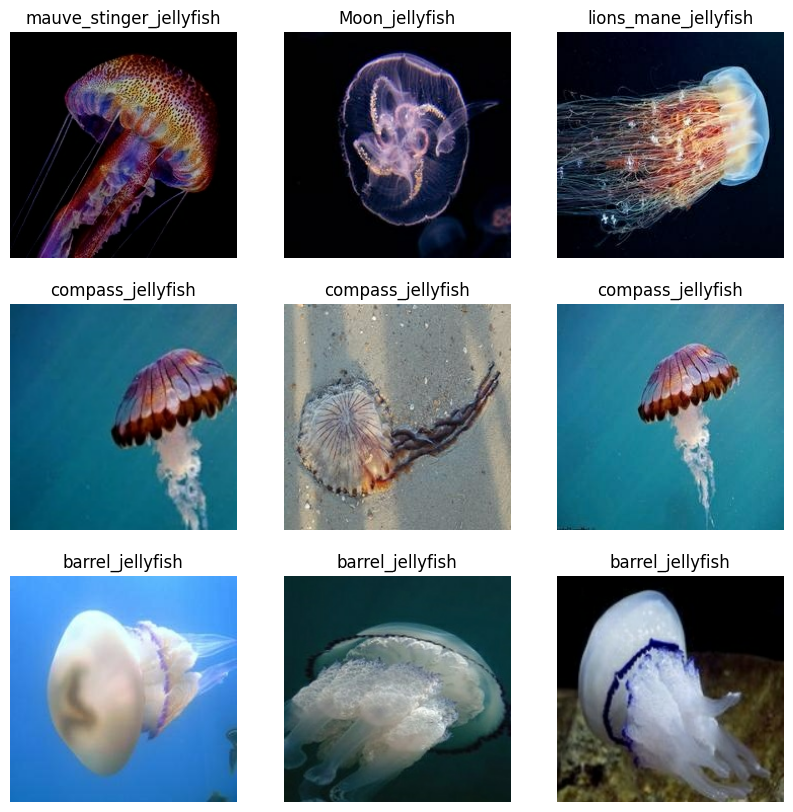

In [17]:
def prepare_dataset(data_dir):
    # Завантаження датасету з директорії
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=(224, 224),  # Зміна розміру зображення
        batch_size=32,          # Розмір батчу
        shuffle=True            # Перемішування даних
    )

    # Виведемо назви класів, які були зчитані
    class_names = dataset.class_names
    print("Класи медуз:", class_names)

    return dataset, class_names

def visualize_random_sample(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Беремо один батч
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

# Вкажіть шлях до директорії з вашими папками медуз
data_dir = r"C:\Users\Ivan\Desktop\Data Analysis\Lab 3\jellyfish_dataset"

# Виклик функції для підготовки датасету
dataset, class_names = prepare_dataset(data_dir)

# Візуалізація випадкової вибірки
visualize_random_sample(dataset, class_names)

In [18]:
def preprocess_for_cnn(dataset, class_names):
    # Розбиття датасету на зображення та мітки
    images, labels = [], []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())

    # Об'єднуємо усі батчі в один
    images = np.concatenate(images)
    labels = np.concatenate(labels)

    # Нормалізація зображень
    images = images / 255.0

    # Перетворення міток в one-hot encoding
    labels = to_categorical(labels, num_classes=len(class_names))

    return images, labels

In [19]:
# Розбиття на навчальну та тестову вибірку
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# Перетворення датасету у формати, готові для CNN
x_train, y_train = preprocess_for_cnn(train_dataset, class_names)
x_test, y_test = preprocess_for_cnn(val_dataset, class_names)


In [23]:
model_from_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

In [24]:
model_from_scratch.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [25]:
history_scratch = model_from_scratch.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2032 - loss: 5.1659 - val_accuracy: 0.3354 - val_loss: 1.5709
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3555 - loss: 1.5692 - val_accuracy: 0.4390 - val_loss: 1.3600
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4531 - loss: 1.3749 - val_accuracy: 0.6280 - val_loss: 1.0669
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5829 - loss: 1.0684 - val_accuracy: 0.5732 - val_loss: 1.0923
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6481 - loss: 0.9295 - val_accuracy: 0.7622 - val_loss: 0.7959
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7289 - loss: 0.7647 - val_accuracy: 0.7805 - val_loss: 0.7227
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8053 - loss: 0.5638 - val_accuracy: 0.7988 - val_loss: 0.5883
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8729 - loss: 0.4699 - val_accuracy: 0.8415 - val_loss:

# Перенесення навчання (VGG16)

In [31]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [32]:
for layer in base_model.layers:
    layer.trainable = False

model_transfer = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
model_transfer.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
history_transfer = model_transfer.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=2,
    batch_size=32
)

Epoch 1/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 186s 8s/step - accuracy: 0.1788 - loss: 3.4155 - val_accuracy: 0.5793 - val_loss: 1.4482
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 175s 8s/step - accuracy: 0.4191 - loss: 1.4688 - val_accuracy: 0.6280 - val_loss: 1.1524


In [33]:
loss_scratch, acc_scratch = model_from_scratch.evaluate(x_test, y_test, verbose=0)
loss_transfer, acc_transfer = model_transfer.evaluate(x_test, y_test, verbose=0)

print(f"Model from Scratch: Accuracy = {acc_scratch:.4f}, Loss = {loss_scratch:.4f}")
print(f"Transfer Learning: Accuracy = {acc_transfer:.4f}, Loss = {loss_transfer:.4f}")

Model from Scratch: Accuracy = 0.8476, Loss = 0.4735
Transfer Learning: Accuracy = 0.6280, Loss = 1.1524


3. Рекурентні нейронні мережі

Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі двома способами:

а) навчить мережу і embedding шар з нуля (from scratch)

б) використовуючи pretrained word embeddings

 Результати порівняйте між собою і з одержаними раніш. 

In [34]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [35]:
df = pd.read_csv('../Lab 2/Leetcode_Questions.csv')
df.head()

,Question_No,Question,Acceptance,isPremium,Difficulty,Question_Link,Solution
0,1,Two Sum,53.80%,False,Easy,https://leetcode.com/problems/two-sum/description,https://leetcode.com/problems/two-sum/solutions
1,2,Add Two Numbers,44.10%,False,Medium,https://leetcode.com/problems/add-two-numbers/...,https://leetcode.com/problems/add-two-numbers/...
2,3,Longest Substring Without Repeating Characters,35.40%,False,Medium,https://leetcode.com/problems/longest-substrin...,https://leetcode.com/problems/longest-substrin...
3,4,Median of Two Sorted Arrays,41.50%,False,Hard,https://leetcode.com/problems/median-of-two-so...,https://leetcode.com/problems/median-of-two-so...
4,5,Longest Palindromic Substring,34.40%,False,Medium,https://leetcode.com/problems/longest-palindro...,https://leetcode.com/problems/longest-palindro...


In [36]:
label_encoder = LabelEncoder()
df["Difficulty"] = label_encoder.fit_transform(df["Difficulty"])  # Easy=0, Medium=1, Hard=2
y = to_categorical(df["Difficulty"])  # One-hot encoding

In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Question"])
vocab_size = len(tokenizer.word_index) + 1

In [38]:
X = tokenizer.texts_to_sequences(df["Question"])
max_len = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_len, padding="post")

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model_from_scratch = Sequential([
    Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [41]:
model_from_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model_from_scratch.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=16
)

Epoch 1/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.5061 - loss: 1.0455 - val_accuracy: 0.5352 - val_loss: 1.0133
Epoch 2/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5340 - loss: 1.0007 - val_accuracy: 0.5266 - val_loss: 0.9983
Epoch 3/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5985 - loss: 0.8654 - val_accuracy: 0.4923 - val_loss: 1.0062
Epoch 4/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7333 - loss: 0.6460 - val_accuracy: 0.4768 - val_loss: 1.1309
Epoch 5/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8097 - loss: 0.4932 - val_accuracy: 0.4631 - val_loss: 1.2647
Epoch 6/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8259 - loss: 0.4310 - val_accuracy: 0.4648 - val_loss: 1.4126
Epoch 7/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8546 - loss: 0.3782 - val_accuracy: 0.4957 - val_loss: 1.4357
Epoch 8/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8596 - loss: 0.3465 - val_acc

# Pretrained embeddings

In [43]:
import tensorflow_hub as hub

In [44]:
from tensorflow.keras.layers import Embedding, SimpleRNN

In [47]:
max_length = 20
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], 
                                 dtype=tf.string, trainable=True)
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length),
    SimpleRNN(64),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Точність моделі на тестовій вибірці: {accuracy:.2f}")

Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5115 - loss: 1.0409 - val_accuracy: 0.5352 - val_loss: 1.0065
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5648 - loss: 0.9411 - val_accuracy: 0.5077 - val_loss: 1.0850
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7378 - loss: 0.6526 - val_accuracy: 0.4220 - val_loss: 1.3132
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8428 - loss: 0.4262 - val_accuracy: 0.4443 - val_loss: 1.4948
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8805 - loss: 0.3015 - val_accuracy: 0.3997 - val_loss: 1.7048
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3851 - loss: 1.7155
Точність моделі на тестовій вибірці: 0.40
